In [1]:
import jax
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from tqdm import tqdm, trange

In [2]:
from jax.config import config
from model import NeuralCBF
from dynamics import DoubleIntegrator

In [3]:
config.update("jax_enable_x64", True)

In [4]:
dyn = DoubleIntegrator()
cbf = NeuralCBF(dyn, cbf_lambda=.2)

In [5]:
cbf.load("ckpts/checkpoint_5300/")

In [11]:
x = jnp.array([-1., -0.001, 0., 0.])
x_target = jnp.array([1., 0., 0., 0.])
u_ref = jnp.array([1., 0.])

In [12]:
cbf.policy(x, u_ref=u_ref, relaxation_penalty=1e6)

(Array([1., 0.], dtype=float64),
 (Array(-0.64816359, dtype=float64),
  Array(-0.14911567, dtype=float64),
  OptStep(params=KKTSolution(primal=Array([1., 0., 0.], dtype=float64), dual_eq=None, dual_ineq=Array([0., 0., 0., 0., 0.], dtype=float64)), state=OSQPState(iter_num=Array(1, dtype=int64, weak_type=True), error=Array(0., dtype=float64, weak_type=True), status=Array(1, dtype=int64, weak_type=True)))))

In [13]:
K = np.array([[1., 0., 1.7, 0.],
              [0., 1., 0., 1.7]])

In [14]:
dt = 1e-2
T = 10
N = int(T / dt) + 1
xs = np.zeros((N, x.shape[0]))
xs[0] = x
u = None
for i in trange(1, N):
    u_ref = K @ (x_target - xs[i-1])
    u, _ = cbf.policy(xs[i-1], u_ref=u_ref, u_init=u)
    xs[i] = xs[i - 1] + dt * dyn.dynamics(xs[i-1], u)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:11<00:00, 13.93it/s]


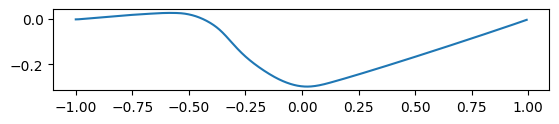

In [15]:
plt.plot(xs[:, 0], xs[:, 1])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

In [5]:
batch = dyn.sample(jax.random.PRNGKey(42), 1024)

In [6]:
batch_safe = batch[dyn.is_safe(batch)]
batch_unsafe = batch[dyn.is_unsafe(batch)]

In [7]:
batch_safe.shape[0]

326

In [8]:
batch_unsafe.shape[0]

538